### Example: An overdetermined least-squares problem 

Task: find a solution to the equation
$${\bf G} {\bf m} = {\bf d}$$
with
${\bf G}=
\begin{bmatrix} 
1  & -1 \\ 
2 & -1 \\
1 & 1
\end{bmatrix}
$
and ${\bf d}=\begin{bmatrix}-1\\0\\2.5\end{bmatrix}$

First we import a few libraries for plotting and linear algebra.

In [1]:
using PyPlot  # use plotting functions from matplotlib (matlab-like)
using LinearAlgebra  # a lot of useful matrix-vector functions

We define the matrix and the vector using (Matlab-like) codes

In [2]:
G = [1 -1;2 -1;1 1];
d = [-1; 0; 2.5];

To have a look at the equations, we rearrange every ($i$th) equation:
$$G_{i1}*m_1 + G_{i2}*m_2 = d_i$$
into 
$$m_2 = \frac{d_i - G_{i1}*m_1}{G_{i2}}$$
and plot the function $m_2(m_1)$ in a certain range:

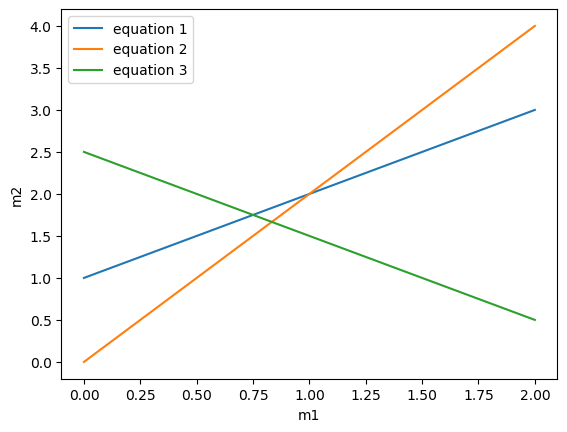

PyObject Text(24.000000000000007, 0.5, 'm2')

In [3]:
xx =[0; 2]
f=figure()
for i in 1:3
    yy = (d[i] .- G[i, 1] * xx) ./ G[i,2]
    plot(xx, yy, label="equation $i") 
end
legend()
xlabel("m1")
ylabel("m2")

The three lines (equations) are almost intersecting each other at about (1, 1.5)
Now we take a close look into the region of interest.
Additionally we consider an error $e$ and plot error bounds by filling a region.

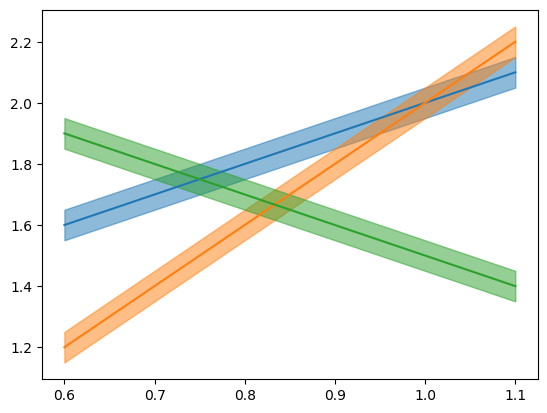

In [4]:
xx = [0.6; 1.1]
e = 0.05
f=figure()
for i in 1:3
    yy = (d[i] .- G[i, 1] * xx) ./ G[i,2]
    j = i - 1
    fill_between(xx, yy.-e, yy.+e, color="C$j", alpha=0.5)
    plot(xx, yy, linestyle="-", color="C$j")
end

Apparently there is no solution that fits all equations.

**Question 1:**: How big has the error to be so that there is a unique solution?

**Task 1:**: Modify $e$ by hand so that the areas meet.

Alternative: make an interactive plot using the `Interact` module.

In [5]:
using Interact  # interactive plots
xx = [0.6; 1.1]
f=figure()
@manipulate for e = 0:0.01:0.1; withfig(f) do
        print(e)
        for i = 1:3
            yy = (d[i] .- G[i, 1] * xx) ./ G[i,2]
            j = i - 1
            fill_between(xx, yy.-e, yy.+e, color="C$j", alpha=0.5)
            # plot(xx, yy, linestyle="-", color="C$j")
        end
    end
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-7764738342248318171\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12037783765339423680\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-7764738342248318171\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

0.05

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["e"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 11,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
6, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\halbm\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\halbm\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\halbm\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\halbm\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\halbm\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000153ace70, Task (runnable) @0x00000000153ace70), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"4466198852463465835\",\"id\":\"ob_

**Question 2:**: What if the data have different errors?

**Task 2:**: Make $e$ a vector (like $b$) and play around.

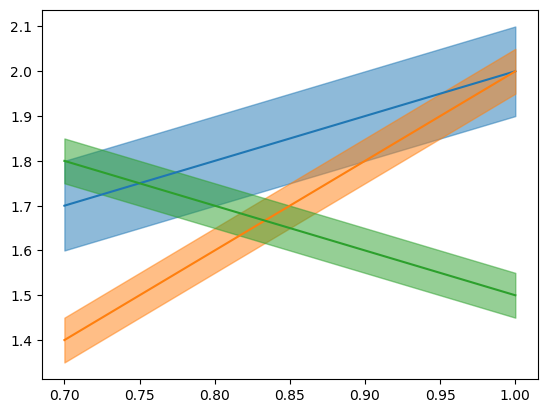

In [13]:
xx = [0.7; 1.0]  # zoom in even a bit more
e = [0.1;0.05;0.05]
f=figure()
for i in 1:3
    yy = (d[i] .- G[i, 1] * xx) ./ G[i,2]
    j = i - 1
    fill_between(xx, yy.-e[i], yy.+e[i], color="C$j", alpha=0.5)
    plot(xx, yy, linestyle="-", color="C$j")
end

### Least-squares solution
We now want to solve the system in the least-squares sense, i.e.
by solving 
$$x = \left({\bf G}^T {\bf G}\right)^{-1} \cdot {\bf G}^T {\bf d}$$

In [27]:
GT = transpose(G)
m = inv(GT * G) * (GT * d)

2-element Array{Float64,1}:
 0.8214285714285714
 1.7142857142857142

We also try out the backslash (\) that we already know from Matlab:

In [28]:
m = G\d  # obviously doing the right thing

2-element Array{Float64,1}:
 0.8214285714285718
 1.7142857142857142

### Error-weighting
We now introduce error-weighting using the predefined error $e$ by solving

$$ {\bf\hat G}{\bf m} = {\bf d} $$

with ${\bf\hat G}={\bf D}{\bf G}$ and ${\bf\hat d}={\bf D}{\bf d}$, where

$${\bf D}=\mbox{diag}(1/e)=
\begin{bmatrix}
1/e_1 & 0     & \ldots & 0 \\
0     & 1/e_2 & \ldots      & 0 \\
\ldots & \ldots & \ddots & \vdots\\
0 & 0 & \ldots & e_D
\end{bmatrix}
$$

In [31]:
D = diagm(1.0./e)
DG = D * G
DGT = transpose(DG)
x = inv(DGT * DG) * (DGT * (D * d))
print(x)
x = DG \ (D*d)
print(x)  # obviously the same

[0.8292682926829269, 1.6829268292682928][0.8292682926829266, 1.6829268292682928]

### Singular value decomposition
The matrix $\bf A$ is decomposed into data and model basis vectors ($\bf U$ and $\bf V$), weighted by singular values in the vector $\bf s$.
$$
{\bf A}= {\bf U} \cdot \mbox{diag}({\bf s}) \cdot {\bf V}^T
$$

In [32]:
B = [1 0.1;1 -0.1]
F = svd(B)
print(F.S)
print(F.V)

[1.4142135623730951, 0.1414213562373095][-1.0 -0.0; -0.0 -1.0]

In [33]:
B = [-A[:, 1] ./ A[:, 2] -b./A[:,2]]

UndefVarError: UndefVarError: A not defined

In [34]:
e = 0:0.01:0.1

0.0:0.01:0.1

In [15]:
@manipulate for e = 0:0.01:0.1
   print(e) 
end

0.05

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["e"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 11,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
6, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\halbm\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\halbm\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\halbm\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\halbm\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\halbm\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000154d2570, Task (runnable) @0x00000000154d2570), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"660815980096934034\",\"id\":\"ob_0

In [16]:
1.0./e

MethodError: MethodError: no method matching length(::Widget{:slider,Float64})
Closest candidates are:
  length(!Matched::Core.SimpleVector) at essentials.jl:596
  length(!Matched::Base.MethodList) at reflection.jl:852
  length(!Matched::Core.MethodTable) at reflection.jl:938
  ...